- [PyTorch Stable & Nightly](https://pytorch.org/get-started/locally/)
- [Previous PyTorch Versions](https://pytorch.org/get-started/previous-versions/)

In [1]:
!pip3 install torch torchvision torchaudio

  Using cached torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl (670.2 MB)
  Using cached nvidia_nccl_cu12-2.18.1-py3-none-manylinux1_x86_64.whl (209.8 MB)
  Using cached triton-2.1.0-0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (89.2 MB)
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.26.dev778 requires torch==2.2.2, but you have torch 2.1.0 which i

In [2]:
!pip install diffusers
!pip install -q accelerate transformers ftfy bitsandbytes gradio natsort safetensors xformers
!pip install --pre -U xformers

import torch
from diffusers import StableDiffusionPipeline

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 2.2.2 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 2.2.2 which is incompatible.
torchtext 0.16.0+cpu requires torch==2.1.0, but you have torch 2.2.2 which is incompatible.
torchvision 0.16.0+cu121 requires torch==2.1.0, but you have torch 2.2.2 which is incompatible.


In [3]:
import diffusers

print(diffusers.__version__)
print(torch.__version__)

0.11.1
2.2.2+cu121


In [4]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]

In [5]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

In [6]:
seed = 36

In [7]:
from PIL import Image

def img_grid(imgs, rows=1, cols=3, scale=1):
  assert len(imgs) == rows * cols

  w, h = imgs[0].size
  w, h = int(w*scale), int(h*scale)

  grid = Image.new('RGB', size=(cols*w, rows*h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(imgs):
      img = img.resize((w,h), Image.ANTIALIAS)
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

## Subject/Object

  0%|          | 0/50 [00:00<?, ?it/s]

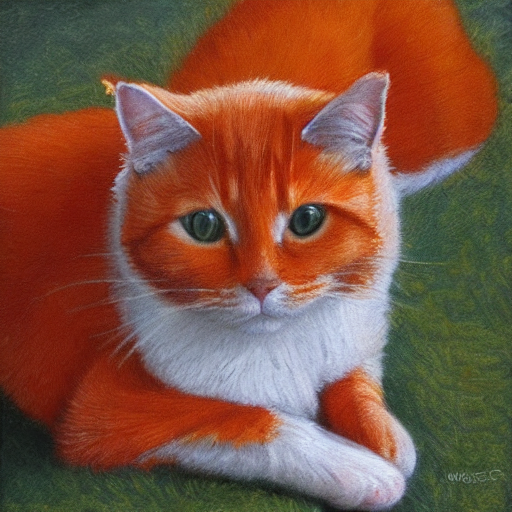

In [8]:
prompt = 'an orange cat'

generator = torch.Generator('cuda').manual_seed(seed)
img = pipe(prompt, generator=generator).images[0]
img